# Lesson 9: Segmentation

- In the classroom, the libraries are already installed for you.
- If you would like to run this code on your own machine, you can install the following:

```
    !pip install transformers
    !pip install gradio
    !pip install timm
    !pip install torchvision
```

- Here is some code that suppresses warning messages.

In [1]:
from transformers.utils import logging
logging.set_verbosity_error()

### Mask Generation with SAM

The [Segment Anything Model (SAM)](https://segment-anything.com) model was released by Meta AI.

### What is Segmentation Mask Generation?

Segmentation mask generation is a computer vision technique that identifies and outlines specific objects or regions within an image. Unlike classification, which assigns labels to entire images, or object detection, which provides bounding boxes, segmentation generates pixel-level masks that precisely define the boundaries of objects.

The process can use input cues such as 2D points (e.g., clicking on an object) or bounding boxes to guide the model. However, it does **not** output the class label of the segmented region—only the shape (mask). This makes it highly flexible for tasks like image editing, medical imaging, and autonomous systems.

---

### Segment Anything Model (SAM): A Groundbreaking Approach

The **Segment Anything Model (SAM)**, developed by Meta, is a state-of-the-art framework designed for general-purpose segmentation mask generation. It can segment *anything* in an image based on minimal user input—such as a point, a box, or even text prompts.

#### Key Features:
- **Image Encoder**: Extracts rich visual features from the input image.
- **Prompt Encoder**: Processes user inputs (points, boxes, text).
- **Mask Decoder**: Combines encoded image features with prompts to generate multiple candidate masks.
- **Output**: Produces high-quality segmentation masks along with confidence scores.

SAM enables **automatic mask generation** without requiring labeled data for training, making it adaptable across domains and applications—from scientific research to content creation.

> **Example**: In the diagram, SAM processes an image of scissors and outputs several plausible segmentation masks, each with a score indicating confidence.

This architecture supports both interactive and fully automated workflows, revolutionizing how we approach visual understanding.

In [2]:
from transformers import pipeline

In [3]:
sam_pipe = pipeline("mask-generation",
    "./models/Zigeng/SlimSAM-uniform-77")

Info about [Zigeng/SlimSAM-uniform-77](https://huggingface.co/Zigeng/SlimSAM-uniform-77)

In [4]:
from PIL import Image

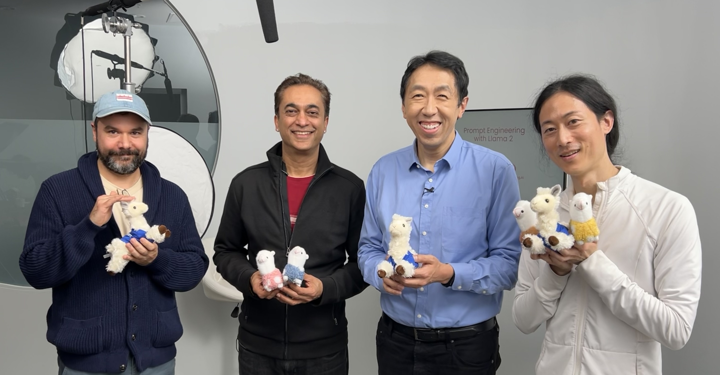

In [5]:
raw_image = Image.open('meta_llamas.jpg')
raw_image.resize((720, 375))

- Running this will take some time
- The higher the value of 'points_per_batch', the more efficient pipeline inference will be

In [6]:
output = sam_pipe(raw_image, points_per_batch=32)

In [7]:
from helper import show_pipe_masks_on_image

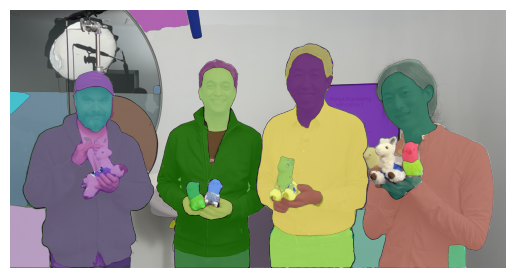

In [8]:
show_pipe_masks_on_image(raw_image, output)

_Note:_ The colors of segmentation, that you will get when running this code, might be different than the ones you see in the video.

### Faster Inference: Infer an Image and a Single Point

In [9]:
from transformers import SamModel, SamProcessor

In [10]:
model = SamModel.from_pretrained(
    "./models/Zigeng/SlimSAM-uniform-77")

processor = SamProcessor.from_pretrained(
    "./models/Zigeng/SlimSAM-uniform-77")

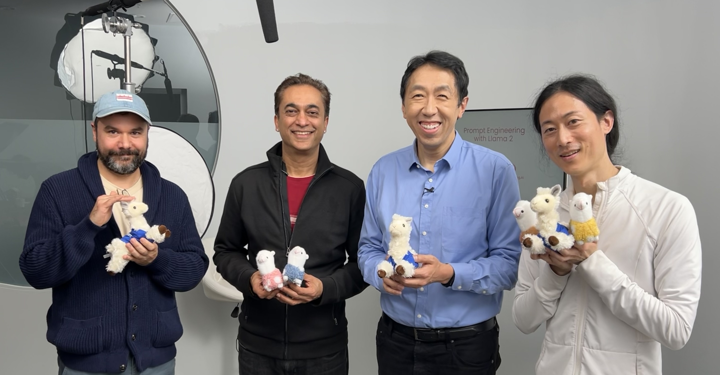

In [11]:
raw_image.resize((720, 375))

- Segment the blue shirt Andrew is wearing.
- Give any single 2D point that would be in that region (blue shirt).

In [12]:
input_points = [[[1600, 700]]]

- Create the input using the image and the single point.
- `return_tensors="pt"` means to return PyTorch Tensors.

In [13]:
inputs = processor(raw_image,
                 input_points=input_points,
                 return_tensors="pt")

- Given the inputs, get the output from the model.

In [14]:
import torch

In [15]:
with torch.no_grad():
    outputs = model(**inputs)

In [16]:
predicted_masks = processor.image_processor.post_process_masks(
    outputs.pred_masks,
    inputs["original_sizes"],
    inputs["reshaped_input_sizes"]
)

 Length of `predicted_masks` corresponds to the number of images that are used in the input.

In [17]:
len(predicted_masks)

1

- Inspect the size of the first ([0]) predicted mask

In [18]:
predicted_mask = predicted_masks[0]
predicted_mask.shape

torch.Size([1, 3, 1500, 2880])

In [19]:
outputs.iou_scores

tensor([[[0.9583, 0.9551, 0.9580]]])

In [20]:
from helper import show_mask_on_image

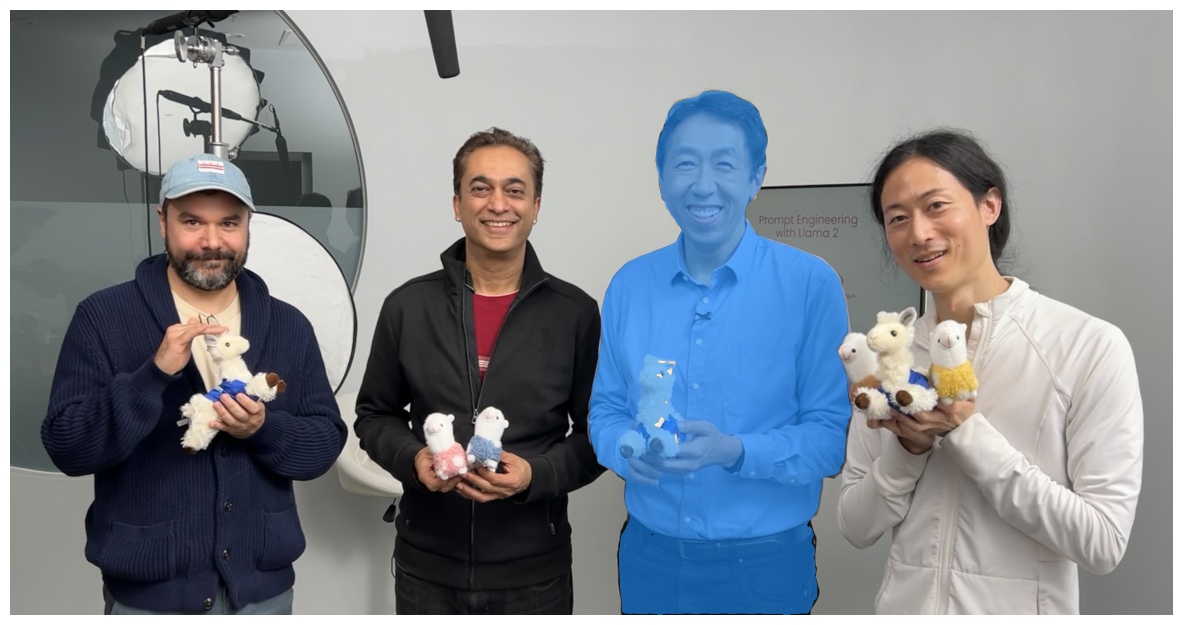

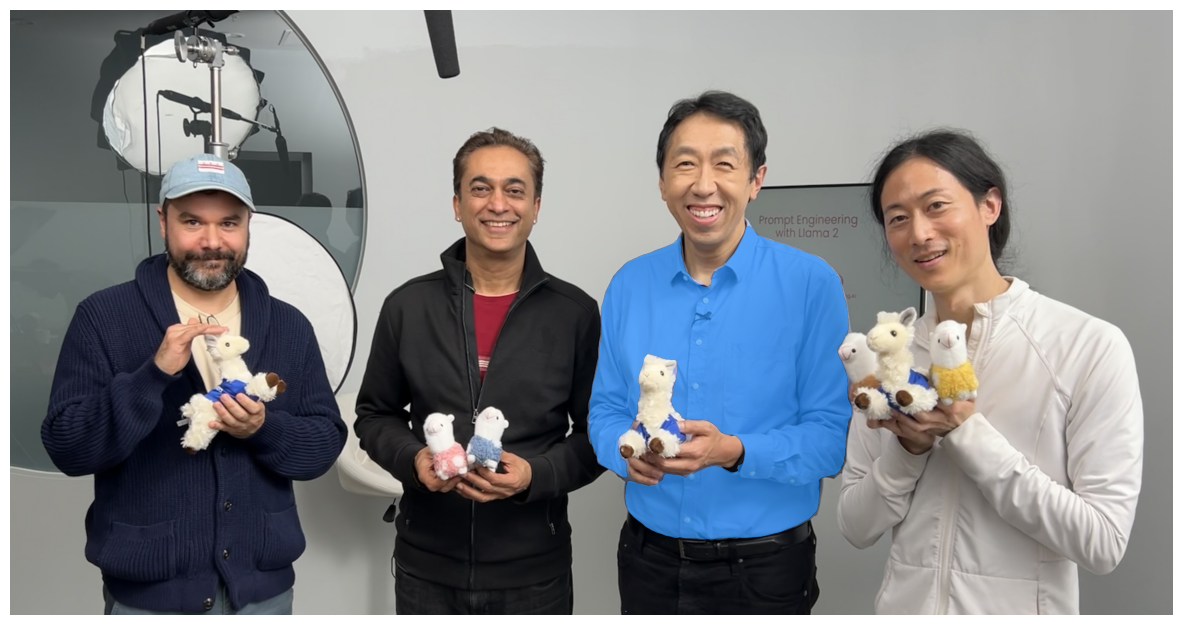

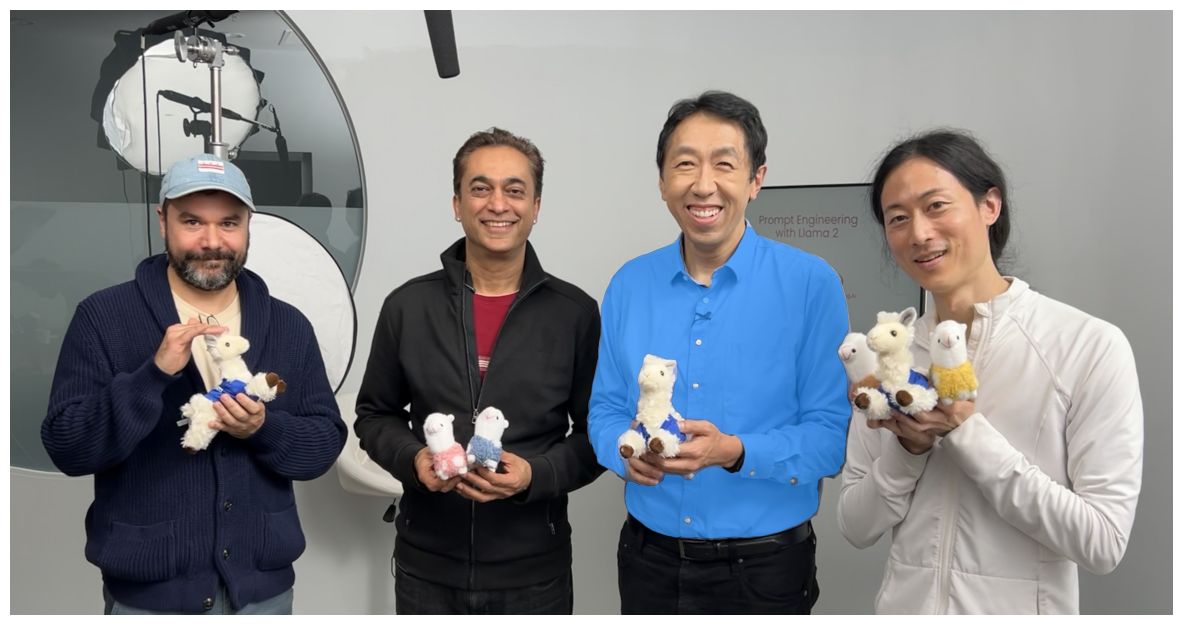

In [21]:
for i in range(3):
    show_mask_on_image(raw_image, predicted_mask[:, i])

## Depth Estimation with DPT

- This model was introduced in the paper [Vision Transformers for Dense Prediction](https://arxiv.org/abs/2103.13413) by Ranftl et al. (2021) and first released in [isl-org/DPT](https://github.com/isl-org/DPT).

### Depth Estimation with DPT (Depth Prediction Transformer)

**DPT (Depth Prediction Transformer)** is a cutting-edge deep learning model designed for **monocular depth estimation**—predicting the depth of objects in a scene from a single 2D image. It leverages the power of **Vision Transformers (ViTs)** to achieve state-of-the-art performance, surpassing traditional CNN-based approaches in accuracy and generalization.

---

#### How DPT Works

1. **Input**: A single RGB image.
2. **Processing**:
   - The image is processed through a **Transformer encoder**, which captures long-range spatial dependencies and global context more effectively than CNNs.
   - The transformer extracts hierarchical features across different scales.
3. **Output**: A **depth map**, where each pixel value represents the estimated distance from the camera to the corresponding point in the scene.

The architecture typically includes:
- **Image Encoder**: A Vision Transformer (e.g., ViT-B/16) that converts the input image into embeddings.
- **Decoder**: A lightweight decoder network that upsamples the feature maps to generate a high-resolution depth prediction.
- **Loss Function**: Often uses metrics like L1 loss or scale-invariant loss to optimize depth predictions.

---

#### Key Advantages of DPT

- ✅ **High Accuracy**: Achieves superior depth estimation compared to CNN-based models.
- ✅ **Generalization**: Performs well on unseen domains and datasets due to strong inductive biases from transformers.
- ✅ **Efficiency**: Can be optimized for real-time inference using techniques like knowledge distillation or quantization.
- ✅ **Versatility**: Applicable in robotics, autonomous driving, augmented reality (AR), and 3D reconstruction.

---

#### Applications

- Autonomous vehicles: Understanding the environment in 3D.
- Robotics: Navigation and obstacle avoidance.
- AR/VR: Creating immersive experiences with realistic depth perception.
- Medical imaging: Analyzing 3D structures from 2D scans.

---

> 🔍 Example: Given an image of a city street, DPT can predict how far away buildings, cars, and pedestrians are—enabling machines to "see" depth without stereo cameras or LiDAR.

DPT exemplifies the shift from CNNs to Transformers in computer vision, demonstrating that attention mechanisms can significantly improve performance in tasks requiring contextual understanding.

In [ ]:
depth_estimator = pipeline(task="depth-estimation",
                        model="./models/Intel/dpt-hybrid-midas")

Info about ['Intel/dpt-hybrid-midas'](https://huggingface.co/Intel/dpt-hybrid-midas)

In [ ]:
raw_image = Image.open('gradio_tamagochi_vienna.png')
raw_image.resize((806, 621))

- If you'd like to generate this image or something like it, check out the short course on [Gradio](https://www.deeplearning.ai/short-courses/building-generative-ai-applications-with-gradio/) and go to the lesson "Image Generation App".

In [ ]:
output = depth_estimator(raw_image)

In [ ]:
output

- Post-process the output image to resize it to the size of the original image.

In [ ]:
output["predicted_depth"].shape

In [ ]:
output["predicted_depth"].unsqueeze(1).shape

In [ ]:
prediction = torch.nn.functional.interpolate(
    output["predicted_depth"].unsqueeze(1),
    size=raw_image.size[::-1],
    mode="bicubic",
    align_corners=False,
)

In [ ]:
prediction.shape

In [ ]:
raw_image.size[::-1],

In [ ]:
prediction

- Normalize the predicted tensors (between 0 and 255) so that they can be displayed.

In [ ]:
import numpy as np 

In [ ]:
output = prediction.squeeze().numpy()
formatted = (output * 255 / np.max(output)).astype("uint8")
depth = Image.fromarray(formatted)

In [ ]:
depth

### Demo using Gradio

### Troubleshooting Tip
- Note, in the classroom, you may see the code for creating the Gradio app run indefinitely.
  - This is specific to this classroom environment when it's serving many learners at once, and you won't wouldn't experience this issue if you run this code on your own machine.
- To fix this, please restart the kernel (Menu Kernel->Restart Kernel) and re-run the code in the lab from the beginning of the lesson.

In [ ]:
import os
import gradio as gr
from transformers import pipeline

In [ ]:
def launch(input_image):
    out = depth_estimator(input_image)

    # resize the prediction
    prediction = torch.nn.functional.interpolate(
        out["predicted_depth"].unsqueeze(1),
        size=input_image.size[::-1],
        mode="bicubic",
        align_corners=False,
    )

    # normalize the prediction
    output = prediction.squeeze().numpy()
    formatted = (output * 255 / np.max(output)).astype("uint8")
    depth = Image.fromarray(formatted)
    return depth

In [ ]:
iface = gr.Interface(launch, 
                     inputs=gr.Image(type='pil'), 
                     outputs=gr.Image(type='pil'))

In [ ]:
iface.launch(share=True, server_port=int(os.environ['PORT1']))

In [ ]:
iface.close()

### Close the app
- Remember to call `.close()` on the Gradio app when you're done using it.

### Try it yourself! 
- Try this model with your own images!